In [1]:
import os
import mat73  #install with pip install mat73
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import signal
from scipy import stats
import koma.oma
import strid
import koma.clustering
import pandas as pd
import random


In [2]:
import scipy 
scipy.__version__

'1.10.1'

(array([0.70138888, 0.70138888, 0.46759259, 0.23379629, 0.23379629,
        0.        , 0.        , 0.        , 0.        , 0.11689815]),
 array([-0.07355025,  0.33380477,  0.7411598 ,  1.14851482,  1.55586985,
         1.96322487,  2.3705799 ,  2.77793492,  3.18528995,  3.59264497,
         4.        ]),
 <BarContainer object of 10 artists>)

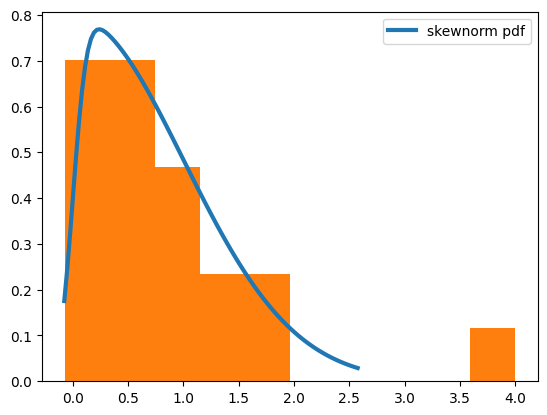

In [3]:
a = 10
# mean, var, skew, kurt = stats.skewnorm.stats(a, moments='mvsk')

fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.skewnorm.ppf(0.01, a),stats.skewnorm.ppf(0.99, a), 100)
ax.plot(x, stats.skewnorm.pdf(x, a), lw=3, label='skewnorm pdf')
ax.legend()
draw=stats.skewnorm.rvs(a,size=20)

draw=np.append(draw,4)  #outlier

# ax.set_xlim([x[0]-0.2, x[-1]])
ax.hist(draw,bins=10,density=True)


[ 1.26371632  0.71437736  0.22366686  0.11035079  0.64873139  0.19942707
  1.53743746 -0.07355025  0.76246065  0.71497741  0.37686296  1.80760967
  0.87772186  0.56781109  0.7849235   1.88579509  0.41393703  0.25750027
  1.12658319  0.11075161  4.        ]


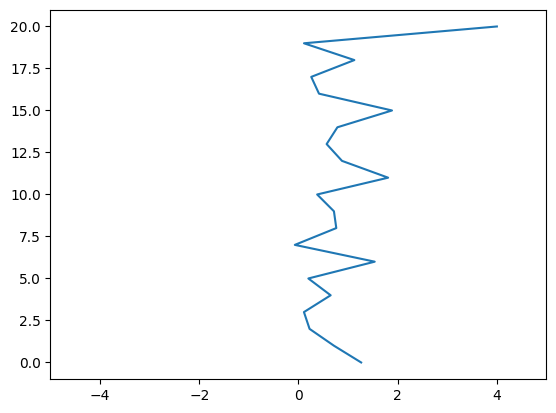

observed mean=  0.8719567299475757


In [4]:
# array=np.random.random(30)
array=draw
y=np.arange(len(array))
print(array)
plt.plot(array,y)
plt.xlim(-5,5)
plt.show()
print('observed mean= ',np.mean(array))

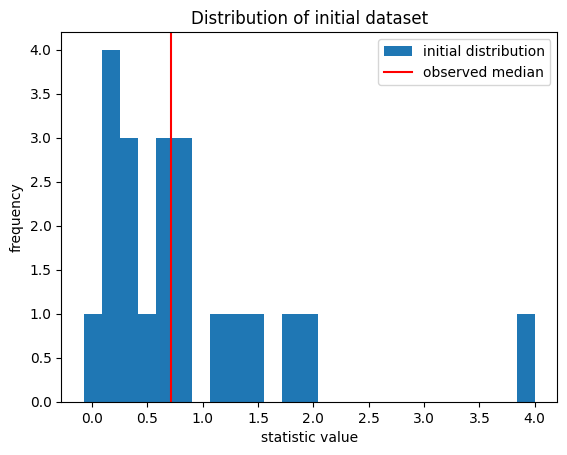

In [5]:
fig, ax = plt.subplots()
ax.hist(array, bins=25,label='initial distribution')
ax.axvline(x=np.median(array),label='observed median',color='red')
ax.set_title('Distribution of initial dataset')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
# ax.set_xlim(0,2)
ax.legend()
plt.show()

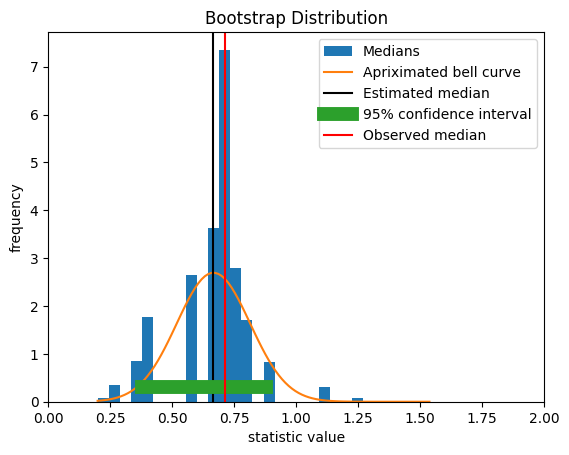

In [6]:
bs= stats.bootstrap((array,),np.median,n_resamples=10000)
fig, ax = plt.subplots()
ax.hist(bs.bootstrap_distribution, bins=30,density=True,label='Medians')
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')

x=np.linspace(np.amin(bs.bootstrap_distribution),
                np.amax(bs.bootstrap_distribution),100)

std_sample = np.mean(bs.bootstrap_distribution)
pdf = stats.norm.pdf(x, loc=std_sample, scale=bs.standard_error)
ax.plot(x,pdf,label='Apriximated bell curve')
ax.set_xlim(0,2)

ax.axvline(np.mean(bs.bootstrap_distribution),label=('Estimated median'),color='black')
ax.plot(bs.confidence_interval[:],[0.3,0.3],linewidth=10,label='95% confidence interval')
ax.axvline(np.median(array),label='Observed median',color='red')

ax.legend()
plt.show()

In [7]:
print((np.array(bs.confidence_interval[0:3])))
print(type((bs.bootstrap_distribution)))

[0.37686296 0.87772186]
<class 'numpy.ndarray'>


# Testing : 